# Deformation maps and ACF

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
#from matflow.api import load_workflow
from skimage.transform import radon
from PIL import Image
import pyvista as pv

# Input of the slice that we want to plot:

In [2]:
y_slice = 0

## We need the displacement and pixel coordinates from the last .vtr file of our simulation

In [3]:
path = "C:/Users/Laura/Dropbox (The University of Manchester)/4th year - Crystal Plasticity and Microstructure Modelling for Rolled Aluminium Sheet/Experiments/Modelling/Results/BA_Section3"
infile = path + "/task_5_simulate_volume_element_loading_plane_strain/viz/geom_load_inc800.vtr"
datainfo = pv.read(infile)
datainfo

RectilinearGrid (0x1803be44400)
  N Cells:      4200000
  N Points:     4283511
  X Bounds:     0.000e+00, 1.519e+02
  Y Bounds:     0.000e+00, 1.000e+02
  Z Bounds:     0.000e+00, 1.595e+02
  Dimensions:   201, 101, 211
  N Arrays:     3

### We save the number of points

In [4]:
num_points = datainfo.dimensions[0]*datainfo.dimensions[1]*datainfo.dimensions[2]
print(num_points)

4283511


In [5]:
num_cells = [datainfo.dimensions[0], datainfo.dimensions[1], datainfo.dimensions[2]]
num_cells

[201, 101, 211]

In [6]:
dim_microns = [ datainfo.bounds[1],datainfo.bounds[3],datainfo.bounds[5]]
dim_microns

[151.94000005722046, 100.0, 159.53700006008148]

In [7]:
pixel_size =dim_microns[0]/num_cells[0], dim_microns[1]/num_cells[1], dim_microns[2]/num_cells[2]
pixel_size

(0.7559203982946292, 0.9900990099009901, 0.7560995263510971)

In [8]:
displ = datainfo.point_data['u']
xdispl = displ[:,0]
ydispl = displ[:,1]    #We save the displacement data from the deformed microstructure (vtr file)
zdispl = displ[:,2]
np.shape(displ)

(4283511, 3)

In [9]:
coordinates = (datainfo.points) # we save the point coordinates
coord_x = coordinates[:,0]
coord_y = coordinates[:,1]
coord_z = coordinates[:,2]

In [10]:
data = {'displacement': displ,'coordinates': coordinates}
np.shape(data['displacement']) == np.shape(data['coordinates'])

True

### Save data in new variables: displacement and corresponding coordinates for the y-slice selected

In [11]:
displ_x = []
displ_z = []

coord_x = []
coord_z = []
for i in range(len(xdispl)):
    if data['coordinates'][i][1]==y_slice:
        displ_x.append(data['displacement'][i][0])
        displ_z.append(data['displacement'][i][2])
        coord_x.append(data['coordinates'][i][0])
        coord_z.append(data['coordinates'][i][2])

In [12]:
slice_data = {'xc': coord_x,'zc': coord_z, 'xd': displ_x , 'zd': displ_z}

In [13]:
slice_data = pd.DataFrame(slice_data)
xd = slice_data['xd']/100
zd = slice_data['zd']/100
slice_data

,xc,zc,xd,zd
0,0.0000,0.000,1.193635,0.759927
1,0.7597,0.000,1.263430,0.653448
2,1.5194,0.000,1.297913,0.591456
3,2.2791,0.000,1.348253,0.533216
4,3.0388,0.000,1.401391,0.481077
...,...,...,...,...
42406,148.9012,159.537,15.988927,-12.616843
42407,149.6609,159.537,16.073370,-12.655752
42408,150.4206,159.537,16.160412,-12.717695
42409,151.1803,159.537,16.263460,-12.823159


In [14]:
xc=list(range(datainfo.dimensions[0])) 
zc=list(range(datainfo.dimensions[2]))
xc_layer=(xc*len(zc))
print('Pixels along x:', len(xc), 'Pixels along z:', len(zc),'\nPixels per slice should be:', len(xc_layer))#size of map along x and y

zc_layer=[]
#yc = [0]*len(xc)
for i in range(len(zc)):
    z=[i]*len(xc)
    zc_layer=zc_layer+z

layer_pix=len(zc_layer)
print('And it is actually:', layer_pix)

total_values=len(xd)
print('The total number of displacement values are:', total_values)

num_layers=num_points/layer_pix  #number of voxels in the whole volume / number of voxels per slice = number of slices
print('So the total number of layers along y-axis is: ', int(np.round(num_layers))) # 

Pixels along x: 201 Pixels along z: 211 
Pixels per slice should be: 42411
And it is actually: 42411
The total number of displacement values are: 42411
So the total number of layers along y-axis is:  101


# Select the voxels at only one layer

In [15]:
#Starting point of the layer selected 
starting_point=0
#Ending point of the layer selected 
ending_point=layer_pix
xdispl_layer=xd[starting_point:ending_point]
zdispl_layer=zd[starting_point:ending_point]
print('Starting point of the layer selected: ', starting_point, '\nEnding point of the layer selected: ', ending_point)

Starting point of the layer selected:  0 
Ending point of the layer selected:  42411


# Table with data pixels along x and y, and displacement along x and y

In [16]:
print('Have all the data got the same length?',len(xc_layer), len(zc_layer), len(xdispl_layer), len(zdispl_layer))

Have all the data got the same length? 42411 42411 42411 42411


### If the data are compatible, We are going to crate a txt file with these data

In [17]:
dict1 = {'xc': xc_layer, 'zc': zc_layer, 'xd': xdispl_layer, 'zd': zdispl_layer}   
df1 = pd.DataFrame(dict1) 

In [18]:
df1

,xc,zc,xd,zd
0,0,0,0.011936,0.007599
1,1,0,0.012634,0.006534
2,2,0,0.012979,0.005915
3,3,0,0.013483,0.005332
4,4,0,0.014014,0.004811
...,...,...,...,...
42406,196,210,0.159889,-0.126168
42407,197,210,0.160734,-0.126558
42408,198,210,0.161604,-0.127177
42409,199,210,0.162635,-0.128232


In [19]:
new_data = df1.to_string(index=False)
newrows = new_data.split('\n')

In [20]:
with open(path + '/data_for_ACF.txt', 'w') as file:
    file.write('\n'.join(newrows))

# ACF from displacement along x and z

### Plot deformation map

In [21]:
class DeformationMap():
    
    def __init__(self,path,fname) :
        self.path=path
        self.fname=fname
        self.data=np.loadtxt(self.path+self.fname,skiprows=1)
        self.xc=self.data[:,0] #x coordinates
        self.zc=self.data[:,1] #y coordinates
        self.xd=self.data[:,2] #z displacement
        self.zd=self.data[:,3] #z displacement
        self.xdim=(self.xc.max()-self.xc.min()
                  )/min(abs((np.diff(self.xc))))+1 #size of map along x
        self.zdim=(self.zc.max()-self.zc.min()
                  )/max(abs((np.diff(self.zc))))+1 #size of map along y
        self.x_map=self._map(self.xd,self.zdim,self.xdim) #u (displacement component along x) 
        self.z_map=self._map(self.zd,self.zdim,self.xdim) #v (displacement component along z) 
        self.f11=self._grad(self.x_map)[1]*100#f11
        self.f22=self._grad(self.z_map)[0]*100#f22
        self.f12=self._grad(self.x_map)[0]*100#f12
        self.f21=self._grad(self.z_map)[1]*100#f21
        print(self.x_map)
        self.max_shear=np.sqrt((((self.f11-self.f22)/2.)**2)
                               + ((self.f12+self.f21))**2)# max shear component
        self.mapshape=np.shape(self.max_shear)
    def _map(self,data_col,ydim,xdim):
        data_map=np.reshape(np.array(data_col),(int(ydim),int(xdim)))
        return data_map
    
    def _grad(self,data_map) :
        grad_step=min(abs((np.diff(self.xc))))
        data_grad=np.gradient(data_map,grad_step,grad_step)
        return data_grad

In [22]:
def_map=DeformationMap('',path + '/data_for_ACF.txt')

[[0.01193635 0.0126343  0.01297913 ... 0.1616041  0.1626346  0.1638763 ]
 [0.011503   0.01234326 0.01260215 ... 0.1605694  0.1618387  0.163443  ]
 [0.00905124 0.00975176 0.01037511 ... 0.1591531  0.16011    0.1609912 ]
 ...
 [0.01051303 0.01113443 0.01175777 ... 0.1612765  0.1618699  0.162453  ]
 [0.0110386  0.01161703 0.01220384 ... 0.1617373  0.1623851  0.1629786 ]
 [0.01193635 0.0126343  0.01297913 ... 0.1616041  0.1626346  0.1638763 ]]


Max 0.352512158557211
Min 0.005956066786706387


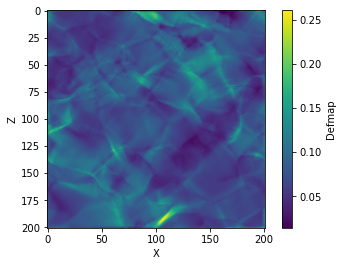

In [23]:
plt.imshow(def_map.max_shear[10:,:],cmap='viridis'); # the first 10 rows were deleted to exclude the buffer layer
plt.xlabel('X')
plt.ylabel('Z')
print("Max", np.max(def_map.max_shear))
print("Min", np.min(def_map.max_shear))

plt.colorbar(label='Defmap')
matplotlib.image.imsave(path + '/defmap_voxels.png', def_map.max_shear)

### Resize deformation map to the real dimention and normalise data\

In [24]:
def resize_image(input_image_path, output_image_path, new_size):
    # Open the image file
    image = Image.open(input_image_path)

    # Resize the image
    resized_image = image.resize(new_size)

    # Save the resized image
    resized_image.save(output_image_path)
    img_array = np.array(resized_image)       
    return img_array

In [25]:
volume_voxels = datainfo.dimensions

In [26]:
volume_size = (volume_voxels[0]*pixel_size[0], volume_voxels[1]*pixel_size[1],volume_voxels[2]*pixel_size[2])

Normalised data from 0 to 1


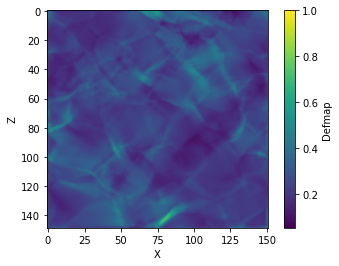

In [27]:
input_image_path = path + "/defmap_voxels.png"
output_image_path = path + "/def_map_resized.png"
new_size = (int(volume_size[0]), int(volume_size[2]))  # Insert width and height of my volume
resized = resize_image(input_image_path, output_image_path, new_size)
plt.imshow(resized[10:,:]/255) # the first 10 rows were deleted to exclude the buffer layer
plt.xlabel('X')
plt.ylabel('Z')
plt.colorbar(label='Defmap')
print('Normalised data from 0 to 1')

In [28]:
def acorr_map(def_map,c_range=[]):
    acorr=(np.fft.fft2(def_map)*np.conjugate(np.fft.fft2(def_map)))
    ashift=np.fft.fftshift(acorr)
    corr_map=np.log(np.fft.fftshift((np.abs(np.fft.ifft2(ashift)))))  


    if c_range==[]:
        plt.imshow(corr_map, interpolation='nearest', cmap='viridis');
        print("Min", np.min(corr_map))
        print("Max", np.max(corr_map))
    else:
        plt.imshow(corr_map, interpolation='nearest', cmap='viridis',
                   vmin=c_range[0], vmax=c_range[1]);
    return corr_map

Min 5.613985228765971
Max 5.75976361024111


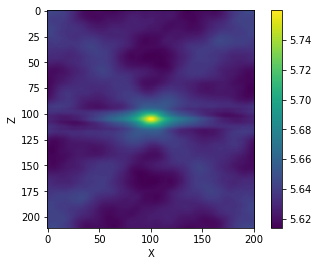

In [29]:
x=acorr_map(def_map.max_shear, c_range=[])
plt.xlabel('X')
plt.ylabel('Z')
matplotlib.image.imsave(path + '/ACF_voxels.png', x)
plt.colorbar()

### Resize ACF map to the real dimention and normalise data

Normalised data from 0 to 1


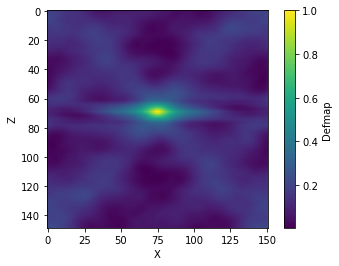

In [30]:
input_image_path = path + "/ACF_voxels.png"
output_image_path = path + "/ACF_resized.png"
resized = resize_image(input_image_path, output_image_path, new_size)
plt.imshow(resized[10:,:]/255) # the first 10 rows were deleted to exclude the buffer layer
plt.xlabel('X')
plt.ylabel('Z')
plt.colorbar(label='Defmap')
print('Normalised data from 0 to 1')

In [31]:
def sb_angle(def_map,threshold=None,median_filter=None):
    """Uses Radon transform to calculate alignment of slip lines
    Returns profile of max intensity of the sinogram in degrees. 
    Threshold can be used to filter data.
    """
    if threshold is not None:
        def_map_filt=def_map>threshold
        strain_title='Threshold: {:2.3f}'.format(threshold)
    else:
        def_map_filt=def_map
        strain_title='Deformation map: no threshold'
    
    if median_filter is not None:    
        def_map_filt=medfilt(def_map_filt,median_filter)
    
    sin_map = radon(def_map_filt)
    profile_filt=np.max(sin_map,axis=0)
    
    plt.figure(figsize=(13,5))
    gs = gridspec.GridSpec(1, 3) 
    ax0=plt.subplot(gs[0])
    ax1=plt.subplot(gs[1])
    ax2=plt.subplot(gs[2])
    ax0.imshow(def_map_filt,cmap='viridis')
    ax0.set_title(strain_title)
    ax1.imshow(sin_map,cmap='viridis')
    ax1.set_title('Sinogram')
    ax2.plot(profile_filt)
    #for i in range(len(profile_filt)):
    #    if profile_filt[i] > 50:
    #        print(i)
    ax2.set_title('Band angle distribution')
    ax2.set_xlabel(r'Angle in degrees')
    ax2.set_ylabel(r'Intensity')
    return profile_filt

C:\Users\Laura\anaconda3\lib\site-packages\skimage\transform\radon_transform.py:83: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


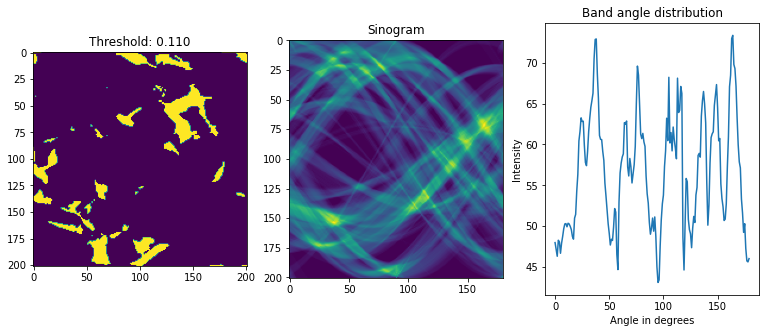

In [32]:
max_shear_angle_profile=sb_angle(def_map.max_shear[10:],threshold=0.11)

# We can analyse subsections of interest and change the threshold

In [33]:
np.shape(def_map.max_shear)

(211, 201)

In [34]:
section=def_map.max_shear[100:,:]

In [35]:
np.shape(section)

(111, 201)

C:\Users\Laura\anaconda3\lib\site-packages\skimage\transform\radon_transform.py:83: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


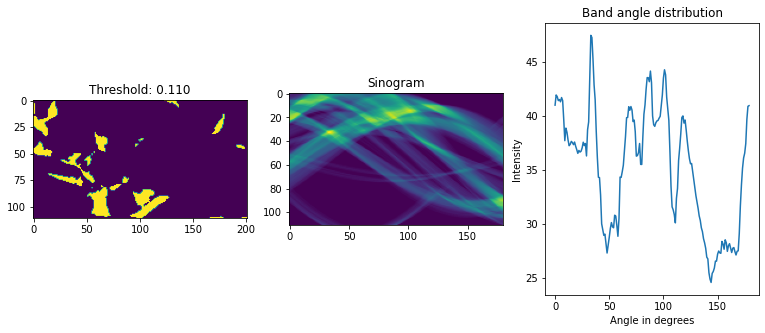

In [36]:
section_max_shear_angle_profile=sb_angle(section,threshold=0.11)

C:\Users\Laura\anaconda3\lib\site-packages\skimage\transform\radon_transform.py:83: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


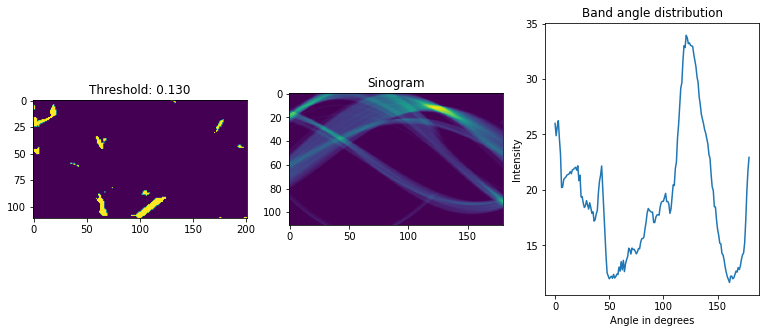

In [37]:
section_max_shear_angle_profile=sb_angle(section,threshold=0.13)